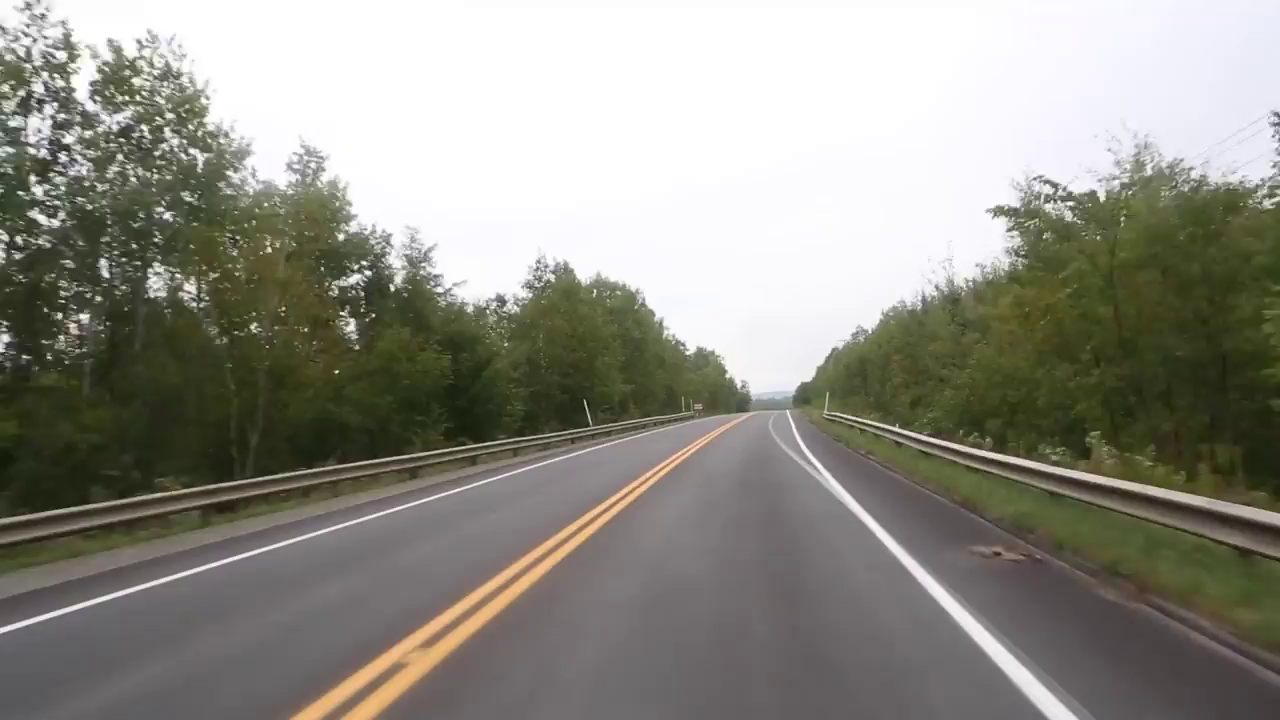

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
capture=cv2.VideoCapture('/content/test1.mp4')
ret,frame=capture.read()
cv2_imshow(frame)


In [ ]:
def canny(img):
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  kernel= 5
  blur=cv2.GaussianBlur(gray,(kernel,kernel),0)
  canny= cv2.Canny(blur,50,150)
  return canny
  

In [ ]:
import numpy as np
def region_of_interest(img):
  height=img.shape[0]
  width=img.shape[1]
  mask= np.zeros_like(img)
  triangle=np.array([[(200,height),(800,350),(1200,height),]],np.int32)
  cv2.fillPoly(mask,triangle,255)
  masked_image= cv2.bitwise_and(img,mask)
  return masked_image

In [ ]:
def houghLines(img):
  houghLines = cv2.HoughLinesP(img,2,np.pi/180,100,np.array([]),minLineLength = 40,maxLineGap = 5)
  return houghLines

In [ ]:
def display_lines_average(img,lines):
  line_image=np.zeros_like(img)
  if lines is not None:
    for line in lines:
      for x1,y1,x2,y2 in line:
      #cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),10)
  return img

In [ ]:
def make_points(img,lineSI):
  slope,intercept=lineSI
  height=img.shape[0]
  y1=int(height)
  y2=int(y1*3.0/5)
  x1=int((y1-intercept)/slope)
  x2=int((y2-intercept)/slope)
  return [[x1,y1,x2,y2]]

In [ ]:
def average_slope_intercept(img,lines):
  left_fit=[]
  right_fit=[]
  for line in lines:
    for x1,y1,x2,y2 in line:
      fit=np.polyfit((x1,x2),(y1,y2),1)
      slope=fit[0]
      intercept=fit[1]
      if slope<0:
        left_fit.append((slope,intercept))
      else:
        right_fit.append((slope,intercept))
  left_fit_average=np.average(left_fit,axis=0)
  right_fit_average=np.average(right_fit,axis=0)
  left_line=make_points(img,left_fit_average)
  right_line=make_points(img,right_fit_average)
  average_lines=[left_line,right_line]
  return average_lines
  


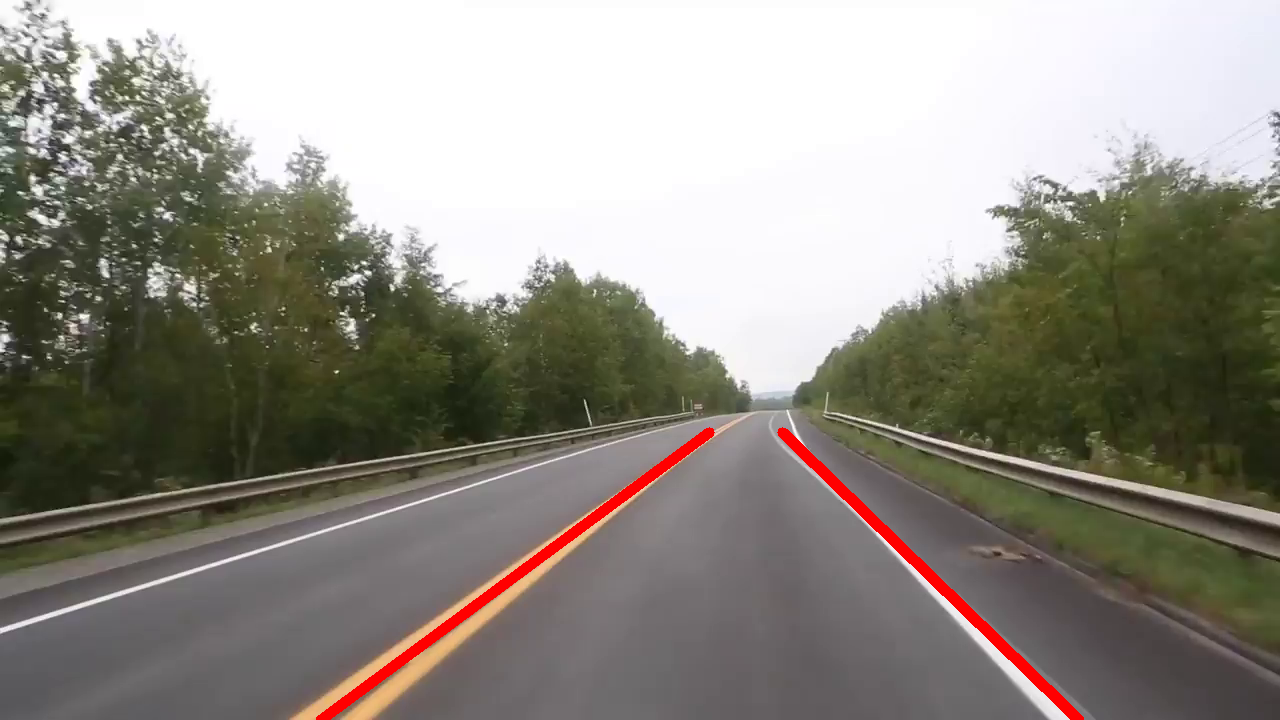

In [ ]:
canny_output=canny(frame)
masked_output=region_of_interest(canny_output)
lines=houghLines(masked_output)
average_lines=average_slope_intercept(frame,lines)
line_image=display_lines_average(frame,average_lines)
cv2_imshow(line_image)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


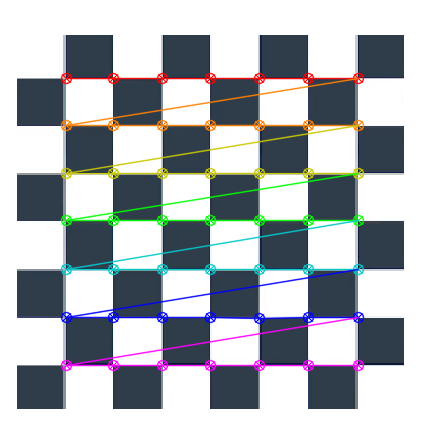

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
nx=7
ny=7
img=cv2.imread('/content/gdrive/MyDrive/c.png')
#cv2_imshow(img)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,corners=cv2.findChessboardCorners(gray,(nx,ny),None)
if ret==True:
  cv2.drawChessboardCorners(img,(nx,ny),corners,ret)
  cv2_imshow(img)

In [ ]:
!git clone https://github.com/Dt-Pham/Advanced-Lane-Lines.git

Cloning into 'Advanced-Lane-Lines'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 104 (delta 3), reused 0 (delta 0), pack-reused 100
Receiving objects: 100% (104/104), 95.77 MiB | 43.98 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
%cd Advanced-Lane-Lines/

/content/Advanced-Lane-Lines


In [ ]:
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

class CameraCalibration():
    """ Class that calibrate camera using chessboard images.

    Attributes:
        mtx (np.array): Camera matrix 
        dist (np.array): Distortion coefficients
    """
    def __init__(self, image_dir, nx, ny, debug=False):
        """ Init CameraCalibration.

        Parameters:
            image_dir (str): path to folder contains chessboard images
            nx (int): width of chessboard (number of squares)
            ny (int): height of chessboard (number of squares)
        """
        fnames = glob.glob("{}/*".format(image_dir))
        objpoints = []
        imgpoints = []
        
        # Coordinates of chessboard's corners in 3D
        objp = np.zeros((nx*ny, 3), np.float32)
        objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)
        
        # Go through all chessboard images
        for f in fnames:
            img = mpimg.imread(f)

            # Convert to grayscale image
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

            # Find chessboard corners
            ret, corners = cv2.findChessboardCorners(img, (nx, ny))
            if ret:
                imgpoints.append(corners)
                objpoints.append(objp)

        shape = (img.shape[1], img.shape[0])
        ret, mtx, dist, _, _ = cv2.calibrateCamera(objpoints, imgpoints, shape, None, None)

        if not ret:
            raise Exception("Unable to calibrate camera")

    def undistort(self, img):
        """ Return undistort image.

        Parameters:
            img (np.array): Input image

        Returns:
            Image (np.array): Undistorted image
        """
        # Convert to grayscale image
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        return cv2.undistort(img, mtx, dist, None, mtx)


In [ ]:
import numpy as np
import cv2
import glob
objpoints=[]
imgpoints=[]
images=glob.glob("{}/*".format('camera_cal'))
print(images)
objp=np.zeros((nx*ny,3),np.float32)
objp=objp[:,:2]*np.mgrid[0:nx,0:ny].T.reshape(-1,2)

['camera_cal/calibration13.jpg', 'camera_cal/calibration14.jpg', 'camera_cal/calibration11.jpg', 'camera_cal/calibration18.jpg', 'camera_cal/calibration1.jpg', 'camera_cal/calibration15.jpg', 'camera_cal/calibration17.jpg', 'camera_cal/calibration5.jpg', 'camera_cal/calibration12.jpg', 'camera_cal/calibration3.jpg', 'camera_cal/calibration19.jpg', 'camera_cal/calibration2.jpg', 'camera_cal/calibration10.jpg', 'camera_cal/calibration7.jpg', 'camera_cal/calibration16.jpg', 'camera_cal/calibration8.jpg', 'camera_cal/calibration6.jpg', 'camera_cal/calibration9.jpg', 'camera_cal/calibration20.jpg', 'camera_cal/calibration4.jpg']


In [ ]:
import numpy as np
for image in images:
  img=cv2.imread(image)
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  ret,corners=cv2.findChessboardCorners(img,(nx,ny))
  if ret:
    imgpoints.append(corners)
    objpoints.append(objp)
    
shape=(img.shape[1],img.shape[0])
ret, mtx, dist,  _,_= cv2.calibrateCamera(objpoints, imgpoints,shape,None,None)

if not ret:
    raise Exception("Unable to calibrate camera")

def undistort(self, img):
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  return cv2.undistort(img, mtx, dist, None, mtx)
  

error: ignored

In [ ]:
img =cv2.imread("camera_cal/calibration1.jpg")
output=undistort(img)
from google.colab.patches import cv2_imshow
#cv2_imshow(output)
display=np.hstack((img,output))
cv2_imshow(display)

NameError: ignored

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/gdrive/MyDrive/straight_lines2.jpg')

In [ ]:
import cv2
import numpy as np
src=np.float32([(550,460),
                (150,720),
                (1200,720),
                (770,460)])
dst=np.float32([(100,0),
                (100,720),
                (1100,720),
                (1100,0)])
M=cv2.getPerspectiveTransform(src,dst)
M_inv=cv2.getPerspectiveTransform(dst,src)

def front_to_top(img):
  size=(1280,720)
  #return cv2.warpPerspective(img,M,size,flags=cv2.INTER_LINEAR)
def top_to_front(img):
  size=(1280,720)
  return cv2.warpPerspective(img,M_inv,size,flags=cv2.INTER_LINEAR)

image=cv2.imread("road.jpg")
output_top=front_to_top(image)
output_front=top_to_front(output_top)

from google.colab.patches import cv2_imshow
display=np.hstack((image,output_top,output_front))
cv2_imshow(display)

error: ignored